<a href="https://colab.research.google.com/github/EnkErdene/skills-test-with-actions/blob/main/Copy_of_NFI25_Open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.1 Dependencies**

In [1]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 1.7 MB/s eta 0:00:00


In [2]:
import osmnx as ox
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd

#**3.2 Get the graph**

In [3]:
place_name= "Barcelona, Barcelonès, Barcelona, Catalonia, 08001, Spain"
G = ox.graph_from_place(place_name, network_type='walk', simplify=True) #other network types: drive, bike, drive_service, all, all_private

In [43]:
G.number_of_nodes()

72054

In [40]:
#save graph
#ox.save_graphml(G, filepath='barcelona_graph.graphml')

In [37]:
#load graph
#G = ox.load_graphml(filepath='barcelona_graph.graphml')

---

#**3.3 Get spatial data**

in the previous notebook, we used datasets that contains geometry type as **"LineString"**, which represent edges, and so we used its information as weight to get the shortest path. We will see now another type of dataset that contains a geometry type as **"Polygon"** , we may be interested in classifying these polygons according to their land uses.

We will  project the Graph we got from osmnx to a **projected cooedinates system**, because we will need to get area attribute of the polygons.

In [7]:
pcs="epsg:32642"  #project the graph from a geographic to a projected coordinates system
G=ox.project_graph(G,to_crs=pcs)

In [8]:
#Retrieve nodes and edges from the graph
nodes, edges = ox.graph_to_gdfs(G)

In [9]:
#Get boundary area by a place name
boundary = ox.geocode_to_gdf(place_name)
boundary=ox.projection.project_gdf(boundary, to_crs=pcs, to_latlong=False)      #project

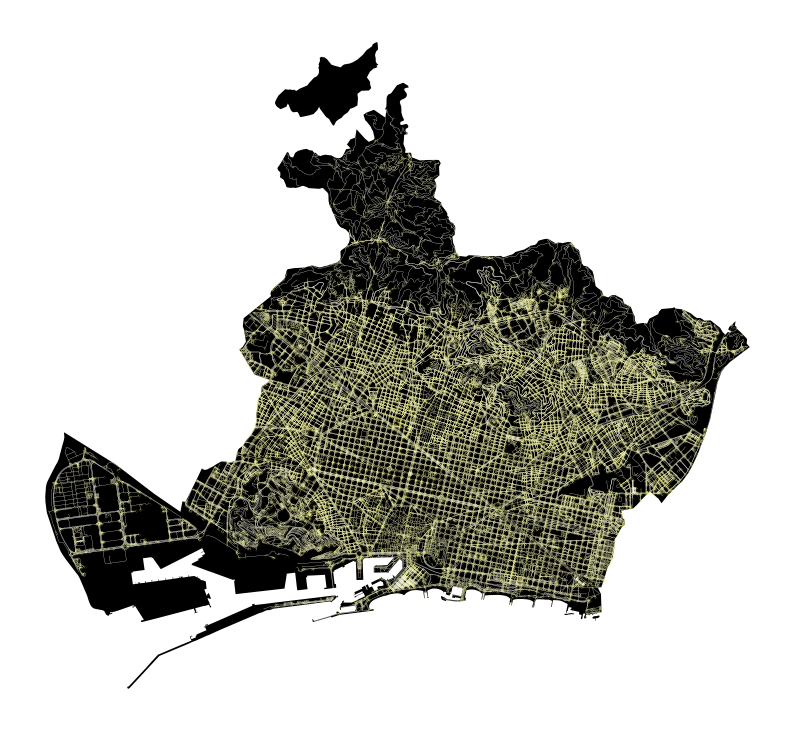

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=0.1, edgecolor='white')
nodes.plot(ax=ax, color='yellow', markersize=0.003)
plt.axis("off")
plt.show()

Let's now get a some Polygon datasets, to use them later in assigning attributes (**features**) to the graph nodes.

##1.Study of the population exposed to atmospheric pollution from the Barcelona City Resilience Atlas

about the dataset:
https://coneixement-eu.bcn.cat/widget/atles-resiliencia/en_index_contaminacio_atmosferica.html

In [11]:
#download data
!curl -L -o file_1.gpkg "https://drive.google.com/uc?export=download&id=1bUtGtcmhPugHb_tdNVzxBGuDNsgQ9W1q"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 9576k  100 9576k    0     0  5793k      0  0:00:01  0:00:01 --:--:-- 30.6M


In [12]:
url_p1='/content/file_1.gpkg'
polygons_01 = gpd.read_file(url_p1)
polygons_01['geometry']=polygons_01['geometry'].to_crs(pcs)
polygons_01

RANG nRisc                                           geometry
0     40 - 45    1A  MULTIPOLYGON (((-4910570.626 7319119.652, -491...
1     45 - 50    1A  MULTIPOLYGON (((-4910564.169 7319108.842, -491...
2     50 - 60    2A  MULTIPOLYGON (((-4910627.977 7319113.078, -491...
3     40 - 45    1A  MULTIPOLYGON (((-4910451.866 7319055.696, -491...
4     40 - 45    1A  MULTIPOLYGON (((-4910362.785 7319016.745, -491...
...       ...   ...                                                ...
2980  40 - 45   1AE  MULTIPOLYGON (((-4905120.813 7318538.313, -490...
2981  45 - 50   1AE  MULTIPOLYGON (((-4905124.922 7318504.442, -490...
2982  40 - 45   1AE  MULTIPOLYGON (((-4904400.253 7326649.556, -490...
2983  45 - 50   1AE  MULTIPOLYGON (((-4904505.411 7326623.426, -490...
2984  50 - 60   2AE  MULTIPOLYGON (((-4904673.38 7326599.939, -4904...

[2985 rows x 3 columns]

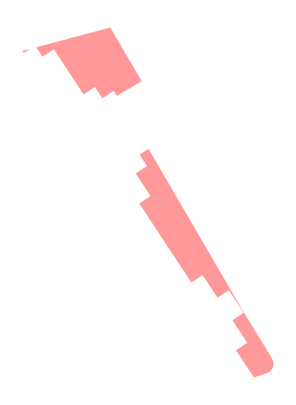

In [13]:
sample01 = polygons_01[0:1]
sample01.plot(facecolor='red',alpha=0.4 ,figsize=(5, 5))  #FROM OPENDATA
plt.axis("off")
plt.show()

In [14]:
#explode multipolygons to polygons
polygons_01= polygons_01.explode()
polygons_01

RANG nRisc                                           geometry
0     40 - 45    1A  POLYGON ((-4910570.626 7319119.652, -4910571.2...
0     40 - 45    1A  POLYGON ((-4910542.651 7319062.148, -4910546.3...
0     40 - 45    1A  POLYGON ((-4910589.899 7319128.832, -4910588.4...
1     45 - 50    1A  POLYGON ((-4910564.169 7319108.842, -4910566.0...
2     50 - 60    2A  POLYGON ((-4910627.977 7319113.078, -4910630.7...
...       ...   ...                                                ...
2983  45 - 50   1AE  POLYGON ((-4904615.505 7326613.623, -4904614.5...
2983  45 - 50   1AE  POLYGON ((-4904623.024 7326611.979, -4904622.3...
2983  45 - 50   1AE  POLYGON ((-4904628.855 7326610.692, -4904623.4...
2983  45 - 50   1AE  POLYGON ((-4904628.855 7326610.692, -4904634.4...
2984  50 - 60   2AE  POLYGON ((-4904673.38 7326599.939, -4904673.82...

[6127 rows x 3 columns]

In [15]:
unique_values = polygons_01['nRisc'].unique()
list(unique_values)

['1A', '2A', '3A', '4A', '1AE', '2AE', '3AE', '4AE']

**Dataset description**(Translated)

By selecting a certain age group, the overlap between areas with the highest population concentration of the selected demographic group and the areas with levels of immission above the recommended thresholds is obtained, identifying the most critical risk points in an indicative manner .
The population by age group exposed above the limit established by the WHO (40 μg/m3 in annual average of NO2) is shown.

The coincidence of each of the four defined levels of NO2 immission, with areas of greater density and concentration of equipment generates a gradation of the level of vulnerability that is collected in the following eight degrees:

- 1A. Average annual immission of 40 to 50 µg/m3 coinciding with population concentration
- 1AE. Average annual immission of 40 to 50 µg/m3 coinciding with population concentration and equipment
- 2A. Average annual immission of 50 to 60 µg/m3 coinciding with population concentration
- 2AE. Average annual immission of 50 to 60 µg/m3 coinciding with population concentration and equipment
- 3A. Average annual intake of 60 to 70 µg/m3 coinciding with population concentration
- 3AE. Average annual immission of 60 to 70 µg/m3 coinciding with population concentration and equipment
- 4A. Annual average immission of 70 µg/m3 and more coinciding with population concentration
- 4AE. Annual average immission of 70 µg/m3 and more coinciding with population concentration and facilities

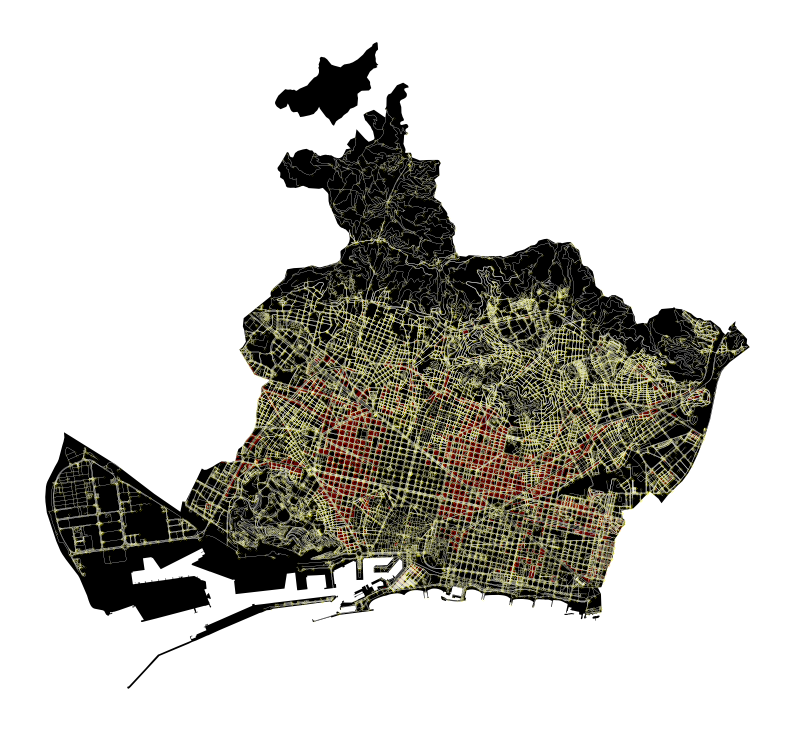

In [16]:
#PLOTTING (making sure both data fit)
f8, ax8 = plt.subplots(figsize=(10, 10))
boundary.plot(ax=ax8, facecolor='black')              #FROM OSMNX
edges.plot(ax=ax8, linewidth=0.1, edgecolor='white')  #FROM OSMNX
nodes.plot(ax=ax8, color='yellow', markersize=0.003)  #FROM OSMNX
polygons_01.plot(ax=ax8,facecolor='red',alpha=0.4 ,legend=True)  #FROM OPENDATA
plt.axis("off")
plt.show()

##2. Density of flats for tourist use in the city of Barcelona

In [17]:
!curl -L -o file_2.gpkg "https://drive.google.com/uc?export=download&id=18c4O-z185rUBLtHBgIxE4RSFNiMDEUkG"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1860k  100 1860k    0     0  2666k      0 --:--:-- --:--:-- --:--:--  129M


In [18]:
url_p2='/content/file_2.gpkg'
polygons_02 = gpd.read_file(url_p2)
polygons_02['geometry']=polygons_02['geometry'].to_crs(pcs)
polygons_02

HABITANTS  NUM_VIVEND  HUT_Casos  HUT_Places  Indicador  \
0           4.0         4.0        0.0         0.0   0.000000   
1         322.0       215.0       10.0        48.0   4.651163   
2         129.0       197.0        2.0        19.0   1.015228   
3          61.0        32.0        0.0         0.0   0.000000   
4         382.0       138.0        4.0        24.0   2.898551   
...         ...         ...        ...         ...        ...   
1633     1369.0       600.0        1.0         5.0   0.166667   
1634     1635.0       766.0        2.0         7.0   0.261097   
1635      444.0       208.0        2.0        15.0   0.961538   
1636      183.0        80.0        1.0         5.0   1.250000   
1637      948.0       727.0        1.0         3.0   0.137552   

                                               geometry  
0     MULTIPOLYGON (((-4910688.677 7318564.519, -491...  
1     MULTIPOLYGON (((-4910098.068 7319168.845, -491...  
2     MULTIPOLYGON (((-4910246.637 7319077.497, -491...  
3     MULTIPOLYGON (((-4910421.37 7319035.569, -4910...  
4     MULTIPOLYGON (((-4910084.836 7319252.749, -491...  
...                                                 ...  
1633  MULTIPOLYGON (((-4902373.371 7320331.095, -490...  
1634  MULTIPOLYGON (((-4902455.189 7319960.75, -4902...  
1635  MULTIPOLYGON (((-4902414.128 7319849.579, -490...  
1636  MULTIPOLYGON (((-4902157.471 7319522.383, -490...  
1637  MULTIPOLYGON (((-4901929.614 7319754.873, -490...  

[1638 rows x 6 columns]

In [19]:
#explode multipolygons to polygons
polygons_02= polygons_02.explode()
polygons_02

HABITANTS  NUM_VIVEND  HUT_Casos  HUT_Places  Indicador  \
0           4.0         4.0        0.0         0.0   0.000000   
1         322.0       215.0       10.0        48.0   4.651163   
2         129.0       197.0        2.0        19.0   1.015228   
3          61.0        32.0        0.0         0.0   0.000000   
4         382.0       138.0        4.0        24.0   2.898551   
...         ...         ...        ...         ...        ...   
1633     1369.0       600.0        1.0         5.0   0.166667   
1634     1635.0       766.0        2.0         7.0   0.261097   
1635      444.0       208.0        2.0        15.0   0.961538   
1636      183.0        80.0        1.0         5.0   1.250000   
1637      948.0       727.0        1.0         3.0   0.137552   

                                               geometry  
0     POLYGON ((-4910688.677 7318564.519, -4910688.7...  
1     POLYGON ((-4910098.068 7319168.845, -4910087.7...  
2     POLYGON ((-4910246.637 7319077.497, -4910257.5...  
3     POLYGON ((-4910421.37 7319035.569, -4910421.13...  
4     POLYGON ((-4910084.836 7319252.749, -4910085.4...  
...                                                 ...  
1633  POLYGON ((-4902373.371 7320331.095, -4902381.0...  
1634  POLYGON ((-4902455.189 7319960.75, -4902458.23...  
1635  POLYGON ((-4902414.128 7319849.579, -4902425.1...  
1636  POLYGON ((-4902157.471 7319522.383, -4902164.1...  
1637  POLYGON ((-4901929.614 7319754.873, -4901925.6...  

[1662 rows x 6 columns]

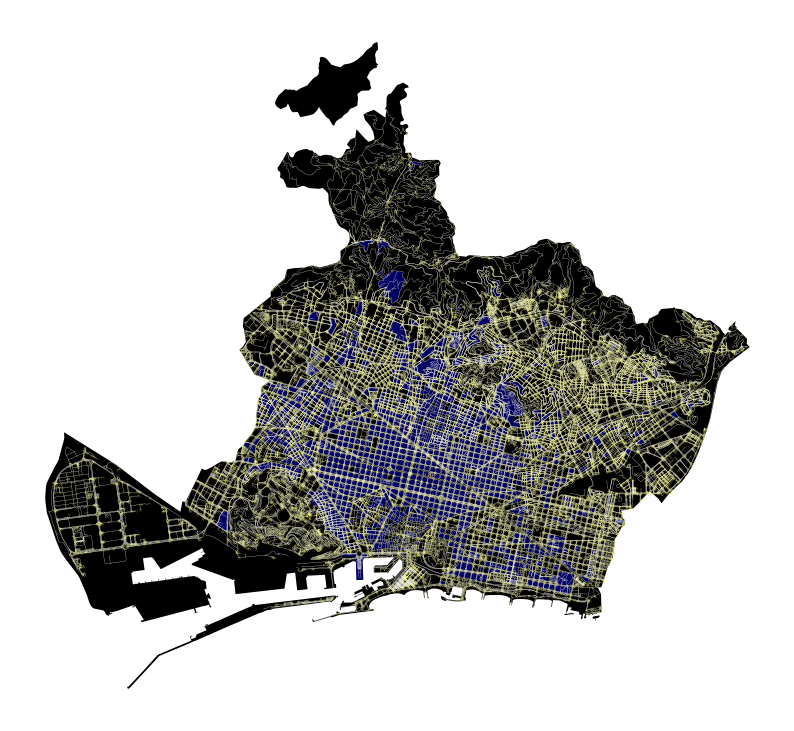

In [20]:
#PLOTTING (making sure both data fit)
fig,ax = plt.subplots(figsize=(10, 10))
boundary.plot(ax=ax, facecolor='black')  #FROM OSMNX
edges.plot(ax=ax, linewidth=0.1, edgecolor='white')
nodes.plot(ax=ax, color='yellow', markersize=0.003)
polygons_02.plot(ax=ax,facecolor='blue',alpha=0.4 ,legend=True)  #FROM OPENDATA
plt.axis("off")
plt.show()

##3.People farthest from públic green spaces in the city of Barcelona

In [21]:
!curl -L -o file_3.gpkg "https://drive.google.com/uc?export=download&id=1ykdp3XbarErw76f_-j4jiN7ZBawEN-sw"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4888k  100 4888k    0     0  2002k      0  0:00:02  0:00:02 --:--:-- 2148k


In [22]:
url_p3='/content/file_3.gpkg'
polygons_03 = gpd.read_file(url_p3)
polygons_03['geometry']=polygons_03['geometry'].to_crs(pcs)
polygons_03

FID_isocro  OBJECTID_1  vulBrk  adultBrk  FID_ER_pad  OBJECTID_2  \
0             -1           0       0         0        3675           0   
1             -1           0       0         0        4204           0   
2            163           0       0         0        1554         164   
3            164           0       0         0        2183         165   
4            199           0       0         0        3960         200   
...          ...         ...     ...       ...         ...         ...   
4465       17814           0       0        10        4369       17815   
4466       17817           0      15        10        4371       17818   
4467       17830           0      15        10        4375       17831   
4468       17831           0      10         5        4375       17832   
4469       18055           0      10         5        4443       18056   

       fid_1  OBJECTID   illa  de00a04  ...  m_00a04  m_05a14  FID_ER_EP0  ID  \
0     3676.0    3676.0  97404       44  ...        1        1          -1   0   
1     4205.0    4205.0   5770       15  ...        1        1          -1   0   
2     1555.0    1555.0  72441        9  ...        1        0          -1   0   
3     2184.0    2184.0   9260       12  ...        1        1          -1   0   
4     3961.0    3961.0   9070       21  ...        1        1          -1   0   
...      ...       ...    ...      ...  ...      ...      ...         ...  ..   
4465  4370.0    4370.0   6552       19  ...        1        0           9  10   
4466  4372.0    4372.0  90020       13  ...        1        1           7   8   
4467  4376.0    4376.0   6130       20  ...        1        1           7   8   
4468  4376.0    4376.0   6130       20  ...        1        1           7   8   
4469  4444.0    4444.0  72466       47  ...        1        1          15  16   

      GRIDCODE   Shape_Leng  Shape_Le_1   Shape_Area  nRisc  \
0            0     0.000000   55.855057     0.038687     3A   
1            0     0.000000    1.024542     0.000430     3A   
2            0     0.000000   35.645162     5.853068     3A   
3            0     0.000000  113.529111   477.824388     3A   
4            0     0.000000  105.376643   358.004249     3A   
...        ...          ...         ...          ...    ...   
4465         1  1355.278359  108.736948   729.700519    3AE   
4466         1  4645.731123  110.130879   683.480842    2AE   
4467         1  4645.731123  174.145435  1268.607590    2AE   
4468         1  4645.731123  225.162991  1750.605937    1AE   
4469         1  6166.852491   37.902971     6.554747    1AE   

                                               geometry  
0     MULTIPOLYGON Z (((-4900952.587 7322620.951 0, ...  
1     MULTIPOLYGON Z (((-4907138.227 7318971.758 0, ...  
2     MULTIPOLYGON Z (((-4913742.197 7324054.422 0, ...  
3     MULTIPOLYGON Z (((-4902417.633 7318261.311 0, ...  
4     MULTIPOLYGON Z (((-4902402.38 7318385.21 0, -4...  
...                                                 ...  
4465  MULTIPOLYGON Z (((-4905536.17 7318671.846 0, -...  
4466  MULTIPOLYGON Z (((-4905185.714 7320746.185 0, ...  
4467  MULTIPOLYGON Z (((-4905047.105 7320596.936 0, ...  
4468  MULTIPOLYGON Z (((-4905044.145 7320505.51 0, -...  
4469  MULTIPOLYGON Z (((-4913226.619 7321903.425 0, ...  

[4470 rows x 72 columns]

**Dataset description**(Translated)
Overlap data between areas with greater population concentration and areas with a lower level of proximity to public green spaces, which makes it possible to identify, in an indicative manner, the areas with the greatest deficit.

The coincidence of each of the three levels of proximity with areas of higher population density and concentration of facilities generates a gradation of the level of vulnerability that is collected in the following six degrees:

- 1A. From 5 to 10 minutes away, coinciding with population concentration.
- 1AE. From 5 to 10 minutes away, coinciding with population concentration and facilities.
- 2A. From 10 to 15 minutes away, coinciding with population concentration.
- 2AE. From 10 to 15 minutes away, coinciding with population concentration and facilities.
- 3A. More than 15 minutes away, coinciding with population concentration.
- 3AE. More than 15 minutes away, coinciding with population concentration and facilities.

In [23]:
#explode multipolygons to polygons
polygons_03= polygons_03.explode()
polygons_03

FID_isocro  OBJECTID_1  vulBrk  adultBrk  FID_ER_pad  OBJECTID_2  \
0             -1           0       0         0        3675           0   
1             -1           0       0         0        4204           0   
2            163           0       0         0        1554         164   
3            164           0       0         0        2183         165   
4            199           0       0         0        3960         200   
...          ...         ...     ...       ...         ...         ...   
4465       17814           0       0        10        4369       17815   
4466       17817           0      15        10        4371       17818   
4467       17830           0      15        10        4375       17831   
4468       17831           0      10         5        4375       17832   
4469       18055           0      10         5        4443       18056   

       fid_1  OBJECTID   illa  de00a04  ...  m_00a04  m_05a14  FID_ER_EP0  ID  \
0     3676.0    3676.0  97404       44  ...        1        1          -1   0   
1     4205.0    4205.0   5770       15  ...        1        1          -1   0   
2     1555.0    1555.0  72441        9  ...        1        0          -1   0   
3     2184.0    2184.0   9260       12  ...        1        1          -1   0   
4     3961.0    3961.0   9070       21  ...        1        1          -1   0   
...      ...       ...    ...      ...  ...      ...      ...         ...  ..   
4465  4370.0    4370.0   6552       19  ...        1        0           9  10   
4466  4372.0    4372.0  90020       13  ...        1        1           7   8   
4467  4376.0    4376.0   6130       20  ...        1        1           7   8   
4468  4376.0    4376.0   6130       20  ...        1        1           7   8   
4469  4444.0    4444.0  72466       47  ...        1        1          15  16   

      GRIDCODE   Shape_Leng  Shape_Le_1   Shape_Area  nRisc  \
0            0     0.000000   55.855057     0.038687     3A   
1            0     0.000000    1.024542     0.000430     3A   
2            0     0.000000   35.645162     5.853068     3A   
3            0     0.000000  113.529111   477.824388     3A   
4            0     0.000000  105.376643   358.004249     3A   
...        ...          ...         ...          ...    ...   
4465         1  1355.278359  108.736948   729.700519    3AE   
4466         1  4645.731123  110.130879   683.480842    2AE   
4467         1  4645.731123  174.145435  1268.607590    2AE   
4468         1  4645.731123  225.162991  1750.605937    1AE   
4469         1  6166.852491   37.902971     6.554747    1AE   

                                               geometry  
0     POLYGON Z ((-4900952.587 7322620.951 0, -49009...  
1     POLYGON Z ((-4907138.227 7318971.758 0, -49071...  
2     POLYGON Z ((-4913742.197 7324054.422 0, -49137...  
3     POLYGON Z ((-4902417.633 7318261.311 0, -49024...  
4     POLYGON Z ((-4902402.38 7318385.21 0, -4902382...  
...                                                 ...  
4465  POLYGON Z ((-4905536.17 7318671.846 0, -490556...  
4466  POLYGON Z ((-4905185.714 7320746.185 0, -49052...  
4467  POLYGON Z ((-4905047.105 7320596.936 0, -49050...  
4468  POLYGON Z ((-4905044.145 7320505.51 0, -490507...  
4469  POLYGON Z ((-4913226.619 7321903.425 0, -49132...  

[4495 rows x 72 columns]

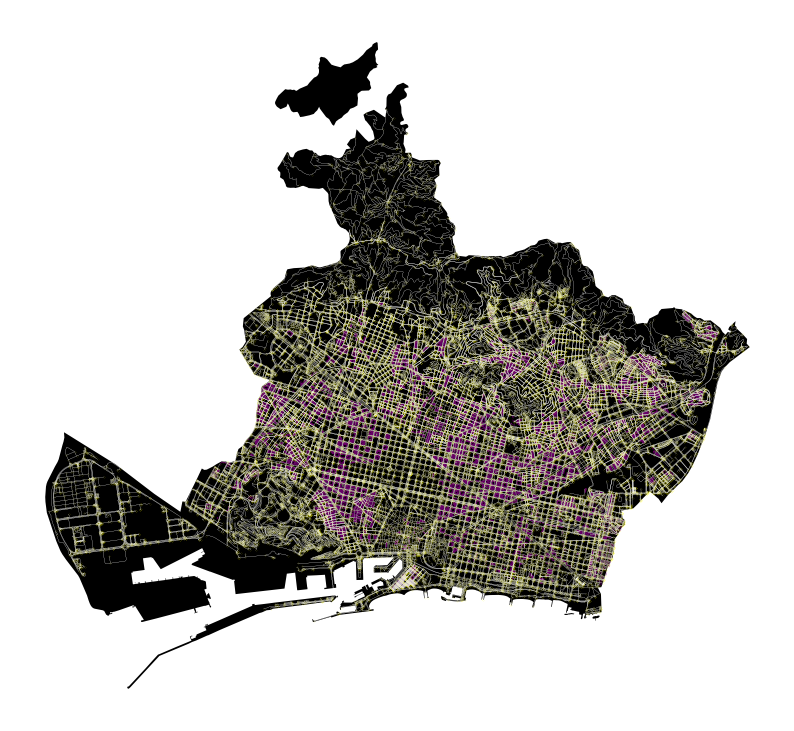

In [24]:
#PLOTTING (making sure both data fit)
fig,ax = plt.subplots(figsize=(10, 10))
boundary.plot(ax=ax, facecolor='black')  #FROM OSMNX
edges.plot(ax=ax, linewidth=0.1, edgecolor='white')
nodes.plot(ax=ax, color='yellow', markersize=0.003)
polygons_03.plot(ax=ax,facecolor='purple',alpha=0.8 ,legend=True)  #FROM OPENDATA
plt.axis("off")
plt.show()

##Add Features

Set polygons features to the graph nodes according to the distance between them. We will use **Spatial index** in order to find the closest polygon's centroid to each node in the graph.

In [25]:
#Graph Nodes
nodes

y             x  street_count          highway  ref  \
osmid                                                                         
13019203     7.321424e+06 -4.912038e+06             3              NaN  NaN   
8085916758   7.321446e+06 -4.912032e+06             4              NaN  NaN   
5720769810   7.321411e+06 -4.912039e+06             3  traffic_signals  NaN   
5720769812   7.321460e+06 -4.912048e+06             3  traffic_signals  NaN   
21638843     7.317306e+06 -4.910297e+06             3              NaN  NaN   
...                   ...           ...           ...              ...  ...   
12917840379  7.318944e+06 -4.904212e+06             1              NaN  NaN   
12917840381  7.318937e+06 -4.904230e+06             1              NaN  NaN   
12917840383  7.318943e+06 -4.904243e+06             1              NaN  NaN   
12917840385  7.318939e+06 -4.904250e+06             1              NaN  NaN   
12917840387  7.318917e+06 -4.904245e+06             1              NaN  NaN   

            junction railway                          geometry  
osmid                                                           
13019203         NaN     NaN  POINT (-4912038.099 7321424.114)  
8085916758       NaN     NaN   POINT (-4912031.55 7321445.806)  
5720769810       NaN     NaN  POINT (-4912038.993 7321410.791)  
5720769812       NaN     NaN  POINT (-4912048.222 7321460.099)  
21638843         NaN     NaN  POINT (-4910296.742 7317306.489)  
...              ...     ...                               ...  
12917840379      NaN     NaN    POINT (-4904212.497 7318943.9)  
12917840381      NaN     NaN   POINT (-4904229.792 7318936.75)  
12917840383      NaN     NaN   POINT (-4904243.17 7318942.589)  
12917840385      NaN     NaN  POINT (-4904250.412 7318938.927)  
12917840387      NaN     NaN  POINT (-4904245.476 7318917.314)  

[72054 rows x 8 columns]

In [26]:
nodes.index

Index([   13019203,  8085916758,  5720769810,  5720769812,    21638843,
        6831738685,  8462014250,  6831706284,    21638845,   885308258,
       ...
       12917840369, 12917840371, 12917840372, 12917840374, 12917840376,
       12917840379, 12917840381, 12917840383, 12917840385, 12917840387],
      dtype='int64', name='osmid', length=72054)

In [27]:
#Spatial Index
from shapely.geometry import Point

#Convert the graph nodes to shapely points
Points_from_Nodes = gpd.GeoSeries(gpd.points_from_xy(list(nodes['x']),list(nodes['y'])))

#Create a dictionary where {key:value} = {Point spatialIndex : Node osmid}
nodes_osmid=list(nodes.index)                      #list of nodes indicies in osmnx graph
Points_spatialindex=list(Points_from_Nodes.index)  #list of  spatial indicies of the created points

osmId_spatialIndex={}

[osmId_spatialIndex.update({i:j}) for i,j in zip(Points_spatialindex,nodes_osmid)]

len(nodes_osmid)                                  #same length of graph nodes

72054

Now let's also get shapely points from the polygons centroids

In [28]:
#Create shapely points from polygons centroids
polygon_01_c_to_points= polygons_01['geometry'].centroid
polygon_02_c_to_points= polygons_02['geometry'].centroid
polygon_03_c_to_points= polygons_03['geometry'].centroid

**r-tree**

R-trees are tree data structures used for spatial access methods, i.e., for indexing multi-dimensional information such as geographical coordinates, rectangles or polygons.

About r-tree
https://towardsdatascience.com/speed-up-your-geospatial-data-analysis-with-r-trees-4f75abdc6025

Find nearest Graph node to each polygon'c centroid of the three polygons datasets
https://geopandas.org/en/stable/docs/reference/sindex.html

In [29]:
#Find nearest points

#nearest() Returns the nearest geometry in the tree for each input geometry in geometry.
#return_all=False if True, might return more than 1 point if there are equale distance-data structure'll change but more accurate
nearest_points_spatial_index_01 = Points_from_Nodes.sindex.nearest(polygon_01_c_to_points,return_all=False,return_distance=False)

nearest_points_spatial_index_01 = nearest_points_spatial_index_01[1].tolist() #[1] the indicies of the nodes_points, whereas [0] the indicies of the polygons centroid points
print(f'graph nodes spatial index{nearest_points_spatial_index_01}')
len(nearest_points_spatial_index_01)          #same as polygons_01

graph nodes spatial index[34244, 38067, 7254, 54121, 38062, 54113, 54114, 38598, 29467, 33210, 4811, 21739, 33210, 4813, 38052, 38052, 38075, 35522, 40148, 35522, 21742, 253, 253, 264, 281, 263, 246, 51261, 51261, 51261, 318, 51261, 4822, 7564, 38886, 38886, 51330, 51340, 51340, 51499, 268, 8798, 51488, 259, 60723, 60723, 53618, 54091, 51246, 7239, 51252, 35593, 8201, 49644, 49644, 49644, 7228, 267, 8241, 272, 272, 272, 272, 272, 272, 2203, 7157, 35089, 8910, 4797, 24850, 19248, 2753, 5718, 45971, 20677, 5718, 19246, 45965, 45965, 5711, 45961, 20679, 49027, 48867, 5869, 49020, 5869, 5866, 45967, 49002, 49011, 49008, 49006, 49015, 49014, 49014, 38, 48999, 38867, 42521, 42521, 52169, 52173, 5666, 5658, 52189, 5653, 25091, 5656, 5658, 52171, 5760, 9110, 48958, 48958, 5895, 48928, 48961, 48905, 5868, 48921, 49018, 48912, 48933, 49012, 48919, 48919, 48903, 48877, 49033, 48889, 48884, 48889, 48894, 48874, 52141, 48864, 52139, 25095, 52139, 52140, 26477, 5695, 5650, 5617, 5649, 52296, 52293, 

6127

In [30]:
#Relate back to osmid
nearest_graph_nodes_01=[osmId_spatialIndex[i] for i in nearest_points_spatial_index_01]
len(nearest_graph_nodes_01) #same number of the polygons centroids

6127

At this point, we have a list of the centerpoints and their nearest nodes

---

In [31]:
#Find nearest points
nearest_points_spatial_index_02=Points_from_Nodes.sindex.nearest(polygon_02_c_to_points,return_all=False,return_distance=False) #return_all=False if True, might return more than 1 point if there are equale distance-data structure'll change but more accurate
print(f'centroids and graph nodes spatial index{nearest_points_spatial_index_02}')
nearest_points_spatial_index_02=nearest_points_spatial_index_02[1].tolist() #[1] the indicies of the nodes_points, whereas [0] the indicies of the polygons centroid points
print(f'graph nodes spatial index{nearest_points_spatial_index_02}')
len(nearest_points_spatial_index_02)          #same as polygons_02

centroids and graph nodes spatial index[[    0     1     2 ...  1659  1660  1661]
 [25153   184   187 ... 70446 34397 59534]]
graph nodes spatial index[25153, 184, 187, 36488, 218, 184, 201, 4807, 1986, 36542, 54122, 34243, 867, 211, 7582, 331, 210, 37471, 856, 46140, 852, 51421, 317, 321, 51330, 264, 29464, 53618, 53623, 258, 49639, 34963, 12685, 7236, 67198, 36097, 7561, 7228, 36100, 7558, 24793, 2771, 32626, 2266, 29447, 2780, 2766, 7163, 7149, 2263, 31084, 7157, 52471, 34955, 8911, 1575, 1579, 1583, 2203, 8906, 8901, 4796, 30399, 1590, 7143, 2207, 7577, 2248, 344, 2251, 340, 337, 1560, 8884, 2759, 1558, 2756, 7167, 2762, 2227, 27270, 2231, 2214, 2217, 1571, 54135, 54078, 5876, 5802, 45986, 45971, 45965, 45935, 48867, 45927, 45938, 45941, 45947, 48983, 48987, 48998, 54073, 52172, 25090, 37708, 48905, 48877, 48889, 48874, 48873, 52139, 52302, 52292, 52290, 52286, 52269, 9217, 32744, 70813, 885, 9104, 9103, 4755, 4769, 8994, 882, 36391, 7613, 9063, 7593, 7603, 877, 1598, 9045, 54642, 

1662

In [32]:
#Relate back to osmid
nearest_graph_nodes_02=[osmId_spatialIndex[i] for i in nearest_points_spatial_index_02]
len(nearest_graph_nodes_02) #same number of the polygons centroids

1662

---

In [33]:
#Find nearest points
nearest_points_spatial_index_03=Points_from_Nodes.sindex.nearest(polygon_03_c_to_points,return_all=False,return_distance=False) #return_all=False if True, might return more than 1 point if there are equale distance-data structure'll change but more accurate
print(f'centroids and graph nodes spatial index{nearest_points_spatial_index_03}')
nearest_points_spatial_index_03=nearest_points_spatial_index_03[1].tolist() #[1] the indicies of the nodes_points, whereas [0] the indicies of the polygons centroid points
print(f'graph nodes spatial index{nearest_points_spatial_index_03}')
len(nearest_points_spatial_index_03)          #same as polygons_03

centroids and graph nodes spatial index[[    0     1     2 ...  4492  4493  4494]
 [65439 66127 55428 ... 46441 63815 50588]]
graph nodes spatial index[65439, 66127, 55428, 68975, 37192, 59519, 56440, 59532, 34399, 19002, 24895, 51495, 51494, 51326, 253, 51232, 51232, 25789, 51242, 29464, 245, 246, 51263, 51261, 317, 30954, 51259, 38888, 4822, 51331, 319, 51262, 319, 51262, 4824, 51331, 51330, 51499, 51328, 270, 51335, 51347, 290, 67213, 51490, 51489, 51488, 258, 257, 60723, 261, 257, 244, 247, 7234, 12420, 51227, 40669, 40669, 7239, 7238, 7236, 24862, 251, 67212, 247, 258, 49643, 49640, 67217, 245, 2264, 8911, 4792, 8910, 8910, 1575, 8901, 30348, 24850, 7153, 7153, 30348, 4797, 2241, 1552, 1552, 2217, 45971, 5802, 45986, 19243, 5717, 5864, 45954, 45934, 45975, 45966, 49027, 45974, 49030, 45959, 49016, 45963, 25052, 45967, 49025, 45927, 30004, 45928, 45938, 45947, 48905, 5868, 48917, 48903, 48897, 48881, 48889, 48874, 52141, 48864, 52140, 26477, 5695, 7604, 1596, 1595, 1598, 7192, 9057

4495

In [34]:
#Relate back to osmid
nearest_graph_nodes_03=[osmId_spatialIndex[i] for i in nearest_points_spatial_index_03]
len(nearest_graph_nodes_03) #same number of the polygons centroids

4495

---

Till now, for each polygon in each dataset,  we have selected the nearest graph node to it. This means:
- not all graph nodes have maye hace been selected
- it is possible that a single node has been selcted multiple times by different polygons.

We can assign a weight to the selected nodes **if it has been selected** by each polygons dataset.

Let's see an example: <br>

If node `A` has been selcted 4 times by 4 polygons in polygons_01, and 1 time by a polygon in polygons_02, while 0 times in polghons_03.

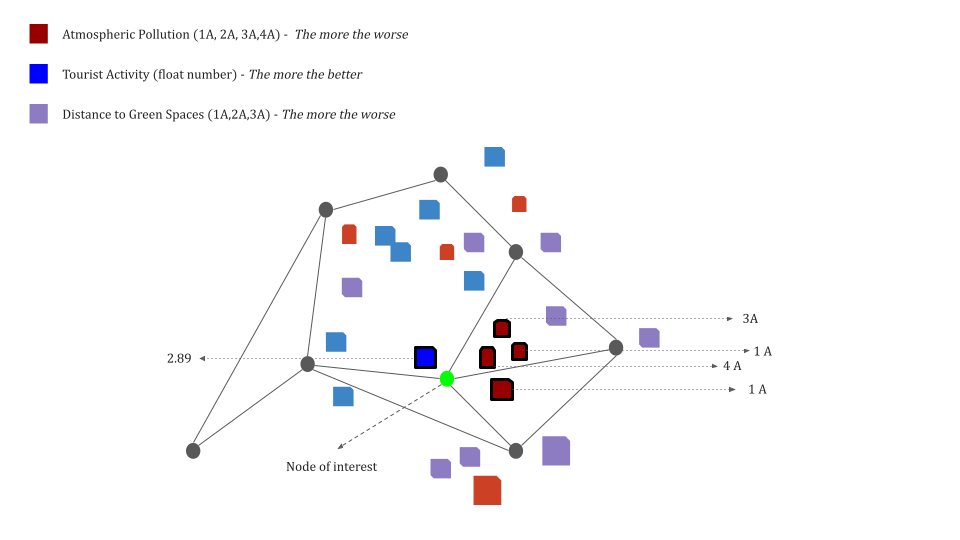

Now we will create a dictionary for Graph nodes selected by each polygons dataset. ***Let's take Polygons_01 as an example***.


{<font color='green'>Key</font>: <font color='orange'>Value</font>} = {<font color='green'>nearest_graph_nodes_01</font>:<font color='orange'> [1 if selected by 1A polygon, 1 if selected by 2A polygon, 1 if selected by 3A polygon, 1 if selected by 4A polygon] </font>}

🟢This will make the attributes_vector for the green node , for dataset_01 as follows:
**[1,0,1,1]**. Even though it is selected 2 times by 1A, for simplicity we will fill the category index by 1, **no matter how many times this category selects the node**.

🔺**Note: For simplicity, 1A and 1AE will be merged into one class 1A, So the 8 classes in polygons_01 will be only 4 classes. The same with Polygons_03.**

**Preprocessing nodes features in the three datasets**

In [ ]:
polygons_01['nRisc']

0        1A
0        1A
0        1A
1        1A
2        2A
       ... 
2983    1AE
2983    1AE
2983    1AE
2983    1AE
2984    2AE
Name: nRisc, Length: 6127, dtype: object

In [ ]:
list(polygons_01.nRisc.unique())

['1A', '2A', '3A', '4A', '1AE', '2AE', '3AE', '4AE']

In [ ]:
#let's simplify the categories first:

processed_nRisc=[]
for i in polygons_01['nRisc']:
  for j in range(1,5):
    if i == str(j) + 'AE':
       processed_nRisc.append(str(j) + 'A')
    elif i == str(j) +'A':
       processed_nRisc.append(i)

polygons_01['processed_nRisc'] = processed_nRisc
unique_categories_01=list(polygons_01.processed_nRisc.unique())
unique_categories_01

['1A', '2A', '3A', '4A']

In [ ]:
polygons_01['processed_nRisc']

0       1A
0       1A
0       1A
1       1A
2       2A
        ..
2983    1A
2983    1A
2983    1A
2983    1A
2984    2A
Name: processed_nRisc, Length: 6127, dtype: object

---

In [ ]:
polygons_01

RANG nRisc                                           geometry  \
0     40 - 45    1A  POLYGON ((-4910570.626 7319119.652, -4910571.2...   
0     40 - 45    1A  POLYGON ((-4910542.651 7319062.148, -4910546.3...   
0     40 - 45    1A  POLYGON ((-4910589.899 7319128.832, -4910588.4...   
1     45 - 50    1A  POLYGON ((-4910564.169 7319108.842, -4910566.0...   
2     50 - 60    2A  POLYGON ((-4910627.977 7319113.078, -4910630.7...   
...       ...   ...                                                ...   
2983  45 - 50   1AE  POLYGON ((-4904615.505 7326613.623, -4904614.5...   
2983  45 - 50   1AE  POLYGON ((-4904623.024 7326611.979, -4904622.3...   
2983  45 - 50   1AE  POLYGON ((-4904628.855 7326610.692, -4904623.4...   
2983  45 - 50   1AE  POLYGON ((-4904628.855 7326610.692, -4904634.4...   
2984  50 - 60   2AE  POLYGON ((-4904673.38 7326599.939, -4904673.82...   

     processed_nRisc  
0                 1A  
0                 1A  
0                 1A  
1                 1A  
2                 2A  
...              ...  
2983              1A  
2983              1A  
2983              1A  
2983              1A  
2984              2A  

[6127 rows x 4 columns]

In [ ]:
polygons_03['nRisc']

0        3A
1        3A
2        3A
3        3A
4        3A
       ... 
4465    3AE
4466    2AE
4467    2AE
4468    1AE
4469    1AE
Name: nRisc, Length: 4495, dtype: object

In [ ]:
list(polygons_03.nRisc.unique())

['3A', '1A', '2A', '3AE', '1AE', '2AE']

In [ ]:
processed_nRisc_3=[]
for i in polygons_03['nRisc']:
  for j in range(1,4):
    if i == str(j) + 'AE':
       processed_nRisc_3.append(str(j) + 'A')
    elif i == str(j) +'A':
       processed_nRisc_3.append(i)
polygons_03['processed_nRisc'] = processed_nRisc_3
unique_categories_03=list(polygons_03.processed_nRisc.unique())
unique_categories_03

['3A', '1A', '2A']

In [ ]:
unique_categories_03=sorted(unique_categories_03)
unique_categories_03

['1A', '2A', '3A']

In [ ]:
polygons_03['processed_nRisc']

0       3A
1       3A
2       3A
3       3A
4       3A
        ..
4465    3A
4466    2A
4467    2A
4468    1A
4469    1A
Name: processed_nRisc, Length: 4495, dtype: object

In [ ]:
polygons_03

FID_isocro  OBJECTID_1  vulBrk  adultBrk  FID_ER_pad  OBJECTID_2  \
0             -1           0       0         0        3675           0   
1             -1           0       0         0        4204           0   
2            163           0       0         0        1554         164   
3            164           0       0         0        2183         165   
4            199           0       0         0        3960         200   
...          ...         ...     ...       ...         ...         ...   
4465       17814           0       0        10        4369       17815   
4466       17817           0      15        10        4371       17818   
4467       17830           0      15        10        4375       17831   
4468       17831           0      10         5        4375       17832   
4469       18055           0      10         5        4443       18056   

       fid_1  OBJECTID   illa  de00a04  ...  m_05a14  FID_ER_EP0  ID  \
0     3676.0    3676.0  97404       44  ...        1          -1   0   
1     4205.0    4205.0   5770       15  ...        1          -1   0   
2     1555.0    1555.0  72441        9  ...        0          -1   0   
3     2184.0    2184.0   9260       12  ...        1          -1   0   
4     3961.0    3961.0   9070       21  ...        1          -1   0   
...      ...       ...    ...      ...  ...      ...         ...  ..   
4465  4370.0    4370.0   6552       19  ...        0           9  10   
4466  4372.0    4372.0  90020       13  ...        1           7   8   
4467  4376.0    4376.0   6130       20  ...        1           7   8   
4468  4376.0    4376.0   6130       20  ...        1           7   8   
4469  4444.0    4444.0  72466       47  ...        1          15  16   

      GRIDCODE   Shape_Leng  Shape_Le_1   Shape_Area  nRisc  \
0            0     0.000000   55.855057     0.038687     3A   
1            0     0.000000    1.024542     0.000430     3A   
2            0     0.000000   35.645162     5.853068     3A   
3            0     0.000000  113.529111   477.824388     3A   
4            0     0.000000  105.376643   358.004249     3A   
...        ...          ...         ...          ...    ...   
4465         1  1355.278359  108.736948   729.700519    3AE   
4466         1  4645.731123  110.130879   683.480842    2AE   
4467         1  4645.731123  174.145435  1268.607590    2AE   
4468         1  4645.731123  225.162991  1750.605937    1AE   
4469         1  6166.852491   37.902971     6.554747    1AE   

                                               geometry  processed_nRisc  
0     POLYGON Z ((-4900952.587 7322620.951 0, -49009...               3A  
1     POLYGON Z ((-4907138.227 7318971.758 0, -49071...               3A  
2     POLYGON Z ((-4913742.197 7324054.422 0, -49137...               3A  
3     POLYGON Z ((-4902417.633 7318261.311 0, -49024...               3A  
4     POLYGON Z ((-4902402.38 7318385.21 0, -4902382...               3A  
...                                                 ...              ...  
4465  POLYGON Z ((-4905536.17 7318671.846 0, -490556...               3A  
4466  POLYGON Z ((-4905185.714 7320746.185 0, -49052...               2A  
4467  POLYGON Z ((-4905047.105 7320596.936 0, -49050...               2A  
4468  POLYGON Z ((-4905044.145 7320505.51 0, -490507...               1A  
4469  POLYGON Z ((-4913226.619 7321903.425 0, -49132...               1A  

[4495 rows x 73 columns]

##**Set nodes attributes**

In [ ]:
from collections import Counter
all_nodes=list(G.nodes)
len(all_nodes) #check number of graph nodes

72054

**Polygons_01 - Atmospheric Pollution**

In [ ]:
print(f' number of nodes selected by this dataset is {len(nearest_graph_nodes_01)}')
print(f' number of unique nodes selected by this dataset is {len(Counter(nearest_graph_nodes_01)) }')

 number of nodes selected by this dataset is 6127
 number of unique nodes selected by this dataset is 4028


<font color='red'>**This means that some nodes have been selected more than once by different polygons**</font>

In [ ]:
nodes_attributes_01= {}

#i is the selected node ID
#j is the category of the polygon to be assigned to the selected node [1A,2A,3A,4A]
for i,j in zip(nearest_graph_nodes_01, polygons_01['processed_nRisc']):

  if i not in nodes_attributes_01.keys():
    nodes_attributes_01[i] = [0,0,0,0]     #initialize a list of four items for the categories

  for k,z in enumerate(unique_categories_01):
    if j == z:
      nodes_attributes_01[i][k]=1   #try z instead of 1 to check the index 1 is placed in is correct

#check the dict structure
print(len(nodes_attributes_01))   #the same as Counter in the previous cell, but each node with its assigned attributes

#Check few items of the nodes attributes dict created for dataset_01
{i: nodes_attributes_01[i] for i in list(nodes_attributes_01)[1000:1020]} #check that some nodes are selected twice

4028


{8232686017: [0, 1, 0, 0],
 8308915927: [1, 0, 0, 0],
 8173456676: [1, 0, 0, 0],
 8235367897: [1, 1, 0, 0],
 8173456672: [1, 1, 0, 0],
 578369832: [1, 0, 0, 0],
 7391288696: [1, 0, 0, 0],
 8308915952: [1, 0, 0, 0],
 8235367902: [1, 1, 0, 0],
 8232654414: [1, 0, 0, 0],
 30251178: [1, 1, 0, 0],
 8232654416: [0, 1, 0, 0],
 8308915928: [1, 0, 0, 0],
 8487364542: [1, 0, 0, 0],
 7391288845: [1, 0, 0, 0],
 8235367910: [1, 0, 0, 0],
 8308916981: [1, 0, 0, 0],
 8235367906: [1, 0, 0, 0],
 8235367908: [1, 1, 0, 0],
 8232654403: [1, 0, 0, 0]}

Let's now set vectors of [0,0,0,0] for nodes have never been selected in this dataset

In [ ]:
#now add to this dictionary the other unselected nodes with value = [0,0,0,0]
unsellected_nodes_01= np.setdiff1d(all_nodes,nearest_graph_nodes_01) #check the nodes that exist in all_nodes but not in the nearest_graph_nodes
unsellected_nodes_01=unsellected_nodes_01.tolist()
[nodes_attributes_01.update({i: [0,0,0,0]}) for i in unsellected_nodes_01]
print(len(unsellected_nodes_01))
print(len(nodes_attributes_01))      #has to be the same number of graph nodes


68026
72054


**Polygons_02 - Tourist Activity**

In this dataset, we only have a float number that represents the intensity of touristic activities

In [ ]:
print(f' number of nodes selected by this dataset is {len(nearest_graph_nodes_02)}')
print(f' number of unique nodes selected by this dataset is {len(Counter(nearest_graph_nodes_02)) }')

 number of nodes selected by this dataset is 1662
 number of unique nodes selected by this dataset is 1651


In [ ]:
#i is the selected node ID
#j is the category of the polygon to be assigned to the selected node [1A,2A,3A,4A]
nodes_attributes_02= {}
for i,j in zip(nearest_graph_nodes_02,polygons_02['Indicador']):
  nodes_attributes_02[i]=j

#check the dict structure
print(len(nodes_attributes_02))   #the same as Counter in the previous cell, but each node with its assigned attributes

#Check few items of the nodes attributes dict created for dataset_01
{i: nodes_attributes_02[i] for i in list(nodes_attributes_02)[100:120]} #check that some nodes are selected twice

1651


{8254390601: 2.27272727273,
 7159121605: 0.854700854701,
 7159121719: 0.709219858156,
 7159121690: 6.18556701031,
 7159121740: 2.5,
 6984927507: 2.43902439024,
 7159121744: 0.662251655629,
 6984927506: 1.72413793103,
 7159098059: 1.76991150442,
 7159098038: 1.05263157895,
 7159194724: 4.16666666667,
 7159194705: 1.06382978723,
 7159194702: 9.67741935484,
 7159194693: 1.04166666667,
 7159169278: 1.26582278481,
 9274849313: 13.3333333333,
 2978991806: 2.38095238095,
 11077506718: 0.917431192661,
 30884400: 91.6666666667,
 4232398051: 1.66666666667}

In [ ]:
#now add to this dictionary the other unselected nodes with value = 0
unsellected_nodes_02= np.setdiff1d(all_nodes,nearest_graph_nodes_02) #check the nodes that exist in all_nodes but not in the nearest_graph_nodes
unsellected_nodes_02=unsellected_nodes_02.tolist()
[nodes_attributes_02.update({i: 0}) for i in unsellected_nodes_02]
print(len(unsellected_nodes_02))
print(len(nodes_attributes_02))      #has to be the same number of graph nodes

70403
72054


**Polygons_03 - Distance to Green Spaces**

Similar to Polygons_01

In [ ]:
print(f' number of nodes selected by this dataset is {len(nearest_graph_nodes_03)}')
print(f' number of unique nodes selected by this dataset is {len(Counter(nearest_graph_nodes_03)) }')

 number of nodes selected by this dataset is 4495
 number of unique nodes selected by this dataset is 3877


<font color='red'>**This means that some nodes have been selected more than once by different polygons**</font>

In [ ]:
#i is the selected node ID
#j is the category of the polygon to be assigned to the selected node [1A,2A,3A]
nodes_attributes_03= {}
for i,j in zip(nearest_graph_nodes_03,polygons_03['processed_nRisc']):

  if i not in nodes_attributes_03.keys():
    nodes_attributes_03[i] = [0,0,0]     #initialize a list of four items for the categories

  for k,z in enumerate(unique_categories_03):
    if j == z:
      nodes_attributes_03[i][k]=1   #try z instead of 1 to check the index 1 is placed in is correct

#check the dict structure
print(len(nodes_attributes_03))   #the same as Counter in the previous cell, but each node with its assigned attributes

#Check few items of the nodes attributes dict created for dataset_01
{i: nodes_attributes_03[i] for i in list(nodes_attributes_03)[:20]} #check that some nodes are selected twice

3877


{8982834621: [0, 0, 1],
 8409437143: [0, 1, 1],
 8148294118: [0, 0, 1],
 8495220296: [0, 0, 1],
 8495220291: [0, 0, 1],
 8149860559: [0, 0, 1],
 7464073266: [0, 0, 1],
 8339550222: [0, 0, 1],
 3306168412: [0, 0, 1],
 994071438: [0, 0, 1],
 1400747734: [0, 0, 1],
 7042621967: [0, 0, 1],
 7042621963: [0, 0, 1],
 8515568555: [0, 0, 1],
 30227157: [0, 0, 1],
 7042178639: [0, 1, 1],
 1514098857: [0, 0, 1],
 7042178651: [0, 0, 1],
 2879016203: [0, 0, 1],
 30227133: [0, 0, 1]}

Let's now set vectors of [0,0,0] for nodes have never been selected in this dataset

In [ ]:
#now add to this dictionary the other unselected nodes with value = [0,0,0]
unsellected_nodes_03= np.setdiff1d(all_nodes,nearest_graph_nodes_03) #check the nodes that exist in all_nodes but not in the nearest_graph_nodes
unsellected_nodes_03=unsellected_nodes_03.tolist()
[nodes_attributes_03.update({i: [0,0,0,0]}) for i in unsellected_nodes_03]
print(len(unsellected_nodes_03))
print(len(nodes_attributes_03))      #has to be the same number of graph nodes


68177
72054


---

###**Add attributes to the graph nodes**
Add all the values stored in the 3 attributes dictionaries to the nodes features according to their osmid

In [ ]:
nodes

y             x  street_count          highway  ref  \
osmid                                                                         
13019203     7.321424e+06 -4.912038e+06             3              NaN  NaN   
8085916758   7.321446e+06 -4.912032e+06             4              NaN  NaN   
5720769810   7.321411e+06 -4.912039e+06             3  traffic_signals  NaN   
5720769812   7.321460e+06 -4.912048e+06             3  traffic_signals  NaN   
21638843     7.317306e+06 -4.910297e+06             3              NaN  NaN   
...                   ...           ...           ...              ...  ...   
12917840379  7.318944e+06 -4.904212e+06             1              NaN  NaN   
12917840381  7.318937e+06 -4.904230e+06             1              NaN  NaN   
12917840383  7.318943e+06 -4.904243e+06             1              NaN  NaN   
12917840385  7.318939e+06 -4.904250e+06             1              NaN  NaN   
12917840387  7.318917e+06 -4.904245e+06             1              NaN  NaN   

            junction railway                          geometry  
osmid                                                           
13019203         NaN     NaN  POINT (-4912038.099 7321424.114)  
8085916758       NaN     NaN   POINT (-4912031.55 7321445.806)  
5720769810       NaN     NaN  POINT (-4912038.993 7321410.791)  
5720769812       NaN     NaN  POINT (-4912048.222 7321460.099)  
21638843         NaN     NaN  POINT (-4910296.742 7317306.489)  
...              ...     ...                               ...  
12917840379      NaN     NaN    POINT (-4904212.497 7318943.9)  
12917840381      NaN     NaN   POINT (-4904229.792 7318936.75)  
12917840383      NaN     NaN   POINT (-4904243.17 7318942.589)  
12917840385      NaN     NaN  POINT (-4904250.412 7318938.927)  
12917840387      NaN     NaN  POINT (-4904245.476 7318917.314)  

[72054 rows x 8 columns]

In [ ]:
nodes_attributes_column_01=[]
for i in nodes.index:
  nodes_attributes_column_01.append(nodes_attributes_01[i]) #nodes_attributes_01 doesn't have the same order as nodes.index , that is why we made a dict

#make a check
#print(nodes_attributes_01[21638843])  #find non zero values
#print(nodes_attributes_column_01[0])

nodes['attributes_01_0']=[nodes_attributes_column_01[i][0] for i in range(len(nodes_attributes_column_01))]
nodes['attributes_01_1']=[nodes_attributes_column_01[i][1] for i in range(len(nodes_attributes_column_01))]
nodes['attributes_01_2']=[nodes_attributes_column_01[i][2] for i in range(len(nodes_attributes_column_01))]
nodes['attributes_01_3']=[nodes_attributes_column_01[i][3] for i in range(len(nodes_attributes_column_01))]

In [ ]:
nodes_attributes_column_02=[]
for i in nodes.index:
  nodes_attributes_column_02.append(nodes_attributes_02[i]) #nodes_attributes_02 doesn't have the same order as nodes.index , that is why we made a dict

#make a check
#print(nodes_attributes_02[21638843])        #find non zero values
#print(nodes_attributes_column_02[0])
nodes['attributes_02']=nodes_attributes_column_02

In [ ]:
nodes_attributes_column_03=[]
for i in nodes.index:
  nodes_attributes_column_03.append(nodes_attributes_03[i]) #nodes_attributes_03 doesn't have the same order as nodes.index , that is why we made a dict

#make a check
#print(nodes_attributes_03[21638843])
#print(nodes_attributes_column_03[0])

nodes['attributes_03_0']=[nodes_attributes_column_03[i][0] for i in range(len(nodes_attributes_column_03))]
nodes['attributes_03_1']=[nodes_attributes_column_03[i][1] for i in range(len(nodes_attributes_column_03))]
nodes['attributes_03_2']=[nodes_attributes_column_03[i][2] for i in range(len(nodes_attributes_column_03))]

In [ ]:
nodes

y             x  street_count          highway  ref  \
osmid                                                                         
13019203     7.321424e+06 -4.912038e+06             3              NaN  NaN   
8085916758   7.321446e+06 -4.912032e+06             4              NaN  NaN   
5720769810   7.321411e+06 -4.912039e+06             3  traffic_signals  NaN   
5720769812   7.321460e+06 -4.912048e+06             3  traffic_signals  NaN   
21638843     7.317306e+06 -4.910297e+06             3              NaN  NaN   
...                   ...           ...           ...              ...  ...   
12917840379  7.318944e+06 -4.904212e+06             1              NaN  NaN   
12917840381  7.318937e+06 -4.904230e+06             1              NaN  NaN   
12917840383  7.318943e+06 -4.904243e+06             1              NaN  NaN   
12917840385  7.318939e+06 -4.904250e+06             1              NaN  NaN   
12917840387  7.318917e+06 -4.904245e+06             1              NaN  NaN   

            junction railway                          geometry  \
osmid                                                            
13019203         NaN     NaN  POINT (-4912038.099 7321424.114)   
8085916758       NaN     NaN   POINT (-4912031.55 7321445.806)   
5720769810       NaN     NaN  POINT (-4912038.993 7321410.791)   
5720769812       NaN     NaN  POINT (-4912048.222 7321460.099)   
21638843         NaN     NaN  POINT (-4910296.742 7317306.489)   
...              ...     ...                               ...   
12917840379      NaN     NaN    POINT (-4904212.497 7318943.9)   
12917840381      NaN     NaN   POINT (-4904229.792 7318936.75)   
12917840383      NaN     NaN   POINT (-4904243.17 7318942.589)   
12917840385      NaN     NaN  POINT (-4904250.412 7318938.927)   
12917840387      NaN     NaN  POINT (-4904245.476 7318917.314)   

             attributes_01_0  attributes_01_1  attributes_01_2  \
osmid                                                            
13019203                   0                0                0   
8085916758                 0                0                0   
5720769810                 0                0                0   
5720769812                 0                0                0   
21638843                   0                0                0   
...                      ...              ...              ...   
12917840379                0                0                0   
12917840381                0                0                0   
12917840383                0                0                0   
12917840385                0                0                0   
12917840387                0                0                0   

             attributes_01_3  attributes_02  attributes_03_0  attributes_03_1  \
osmid                                                                           
13019203                   0            0.0                0                0   
8085916758                 0            0.0                0                0   
5720769810                 0            0.0                0                0   
5720769812                 0            0.0                0                0   
21638843                   0            0.0                0                0   
...                      ...            ...              ...              ...   
12917840379                0            0.0                0                0   
12917840381                0            0.0                0                0   
12917840383                0            0.0                0                0   
12917840385                0            0.0                0                0   
12917840387                0            0.0                1                0   

             attributes_03_2  
osmid                         
13019203                   0  
8085916758                 0  
5720769810                 0  
5720769812                 0  
21638843                   0  
...    

###**Visualization of nodes attributes**

Text(0.5, 1.0, 'Atmospheric Pollution 4A')

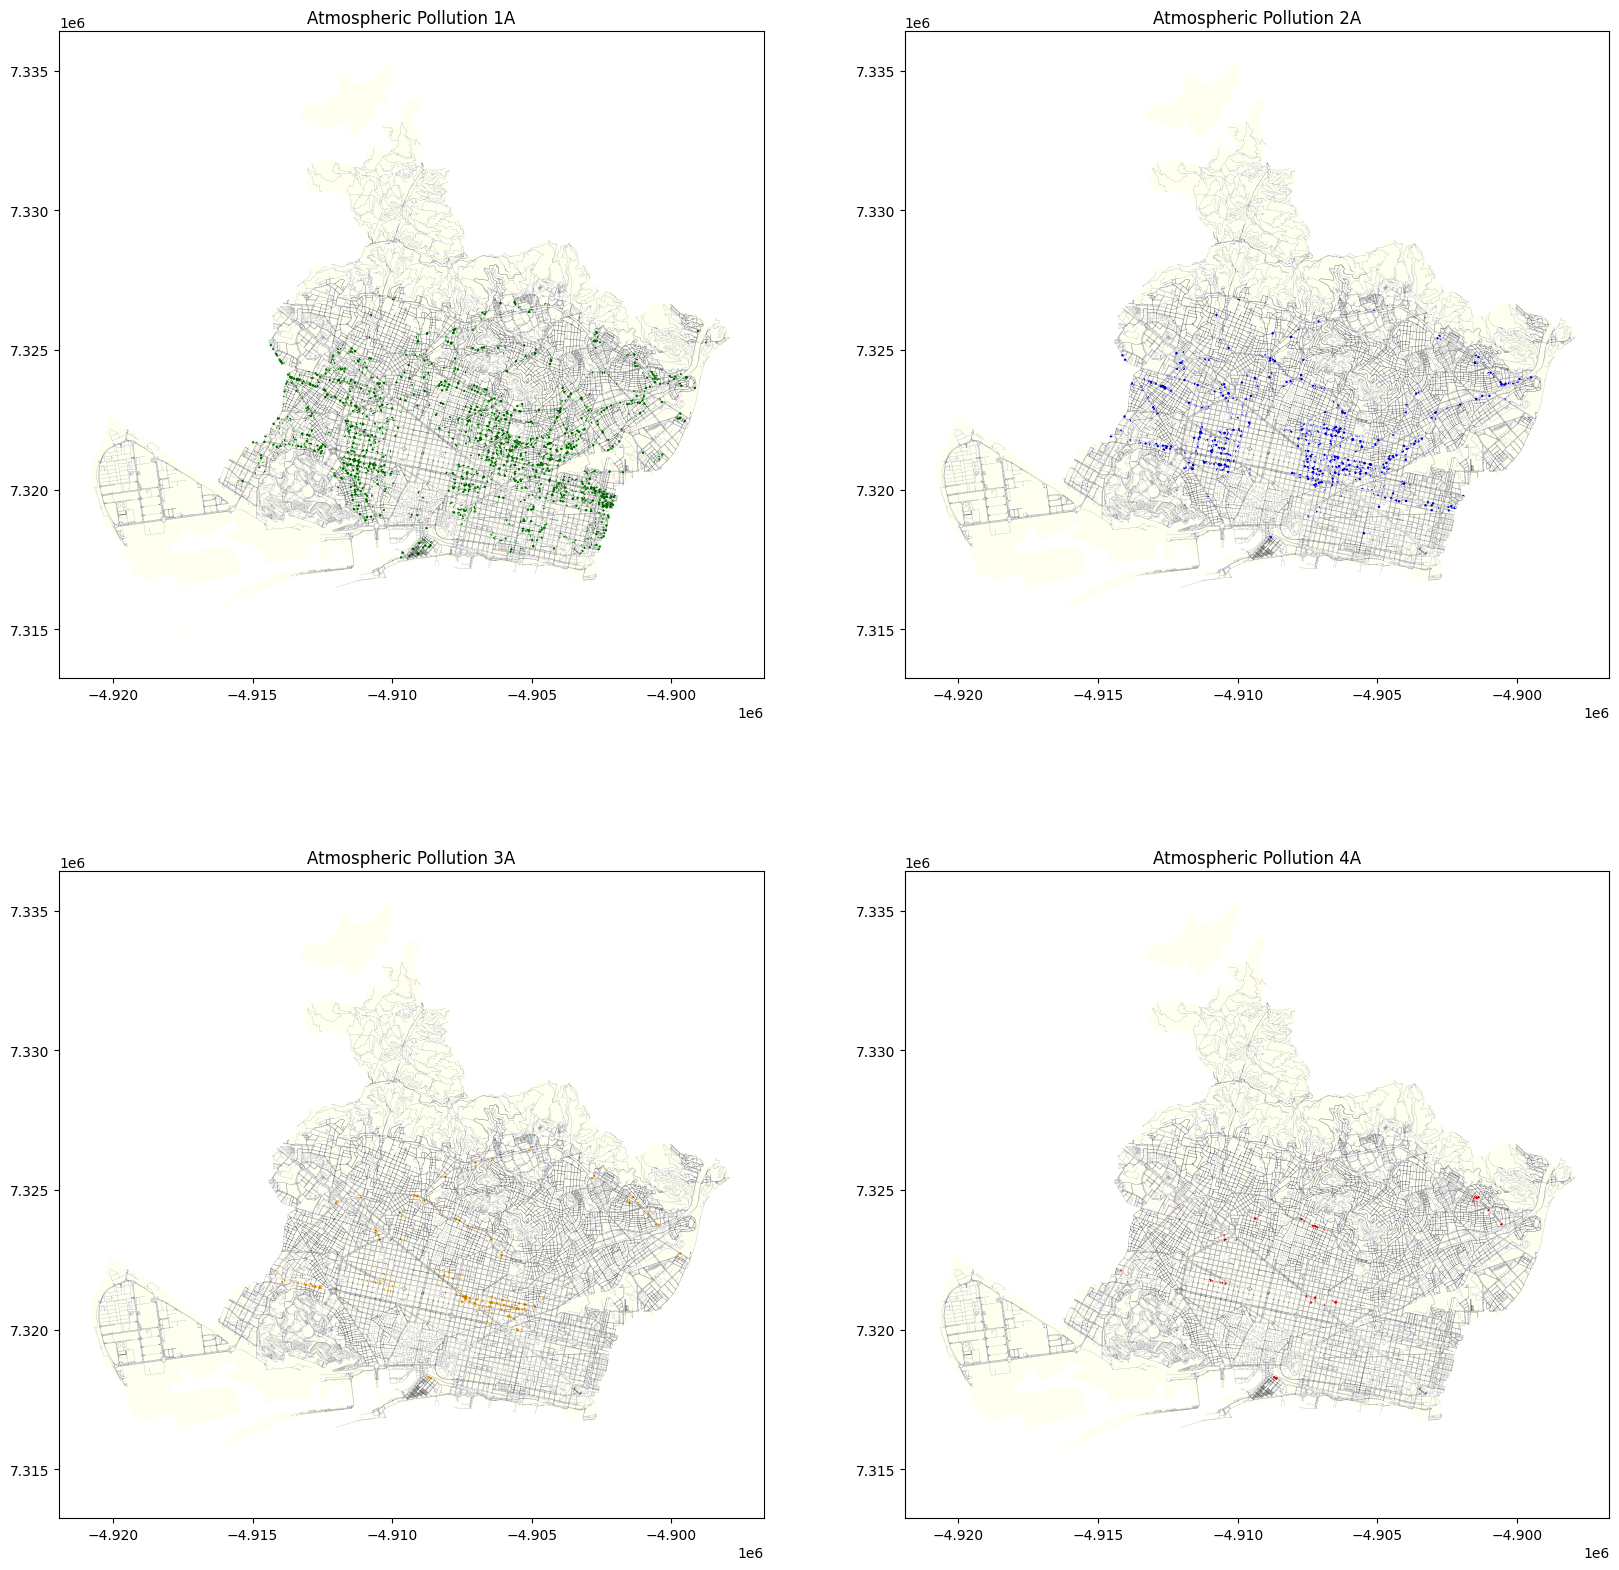

In [ ]:
#color the nodes according to their attributes 1A,2A,3A,4A according to the first dataset

fig = plt.figure(figsize=(20,20))
unselected='white'
node_size=0.6
edge_color='black'
edge_width=0.03
boyndary_color='ivory'

#1A
ax = fig.add_subplot(2,2,1)
c_list_1A=[unselected if i==0  else 'green' for i in list(nodes['attributes_01_0']) ]    #color list
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_1A, markersize=node_size)
ax.set_title('Atmospheric Pollution 1A')

#2A
ax = fig.add_subplot(2,2,2)
c_list_2A=[unselected if i==0  else 'blue' for i in list(nodes['attributes_01_1']) ]
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_2A, markersize=node_size)
ax.set_title('Atmospheric Pollution 2A')

#3A
ax = fig.add_subplot(2,2,3)
c_list_3A=[unselected if i==0  else 'orange' for i in list(nodes['attributes_01_2']) ]
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_3A, markersize=node_size)
ax.set_title('Atmospheric Pollution 3A')

#4A
ax = fig.add_subplot(2,2,4)
c_list_4A=[unselected if i==0  else 'red' for i in list(nodes['attributes_01_3']) ]
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_4A, markersize=node_size)

ax.set_title('Atmospheric Pollution 4A')

Text(0.5, 1.0, 'Tourist Activity')

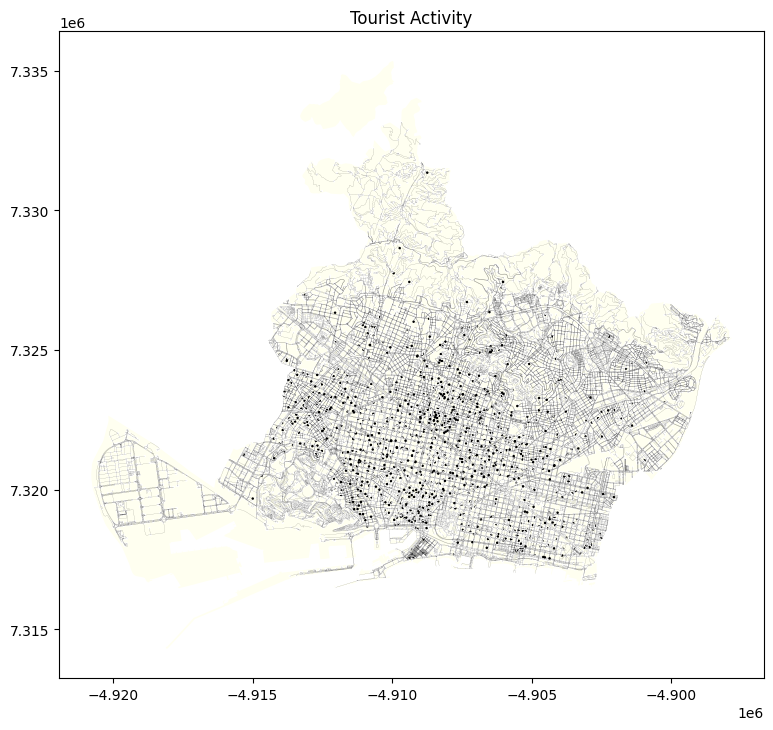

In [ ]:
#color the nodes according to their attributes according to the second dataset
unselected='white'
fig = plt.figure(figsize=(20,20))
node_size=0.6
edge_color='black'
edge_width=0.03
boyndary_color='ivory'

#1A
ax = fig.add_subplot(2,2,1)
c_list_02=[unselected if i==0  else 'black' for i in list(nodes['attributes_02']) ]
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_02, markersize=node_size)
ax.set_title('Tourist Activity')

Text(0.5, 1.0, 'Distance to Green Spaces 3A')

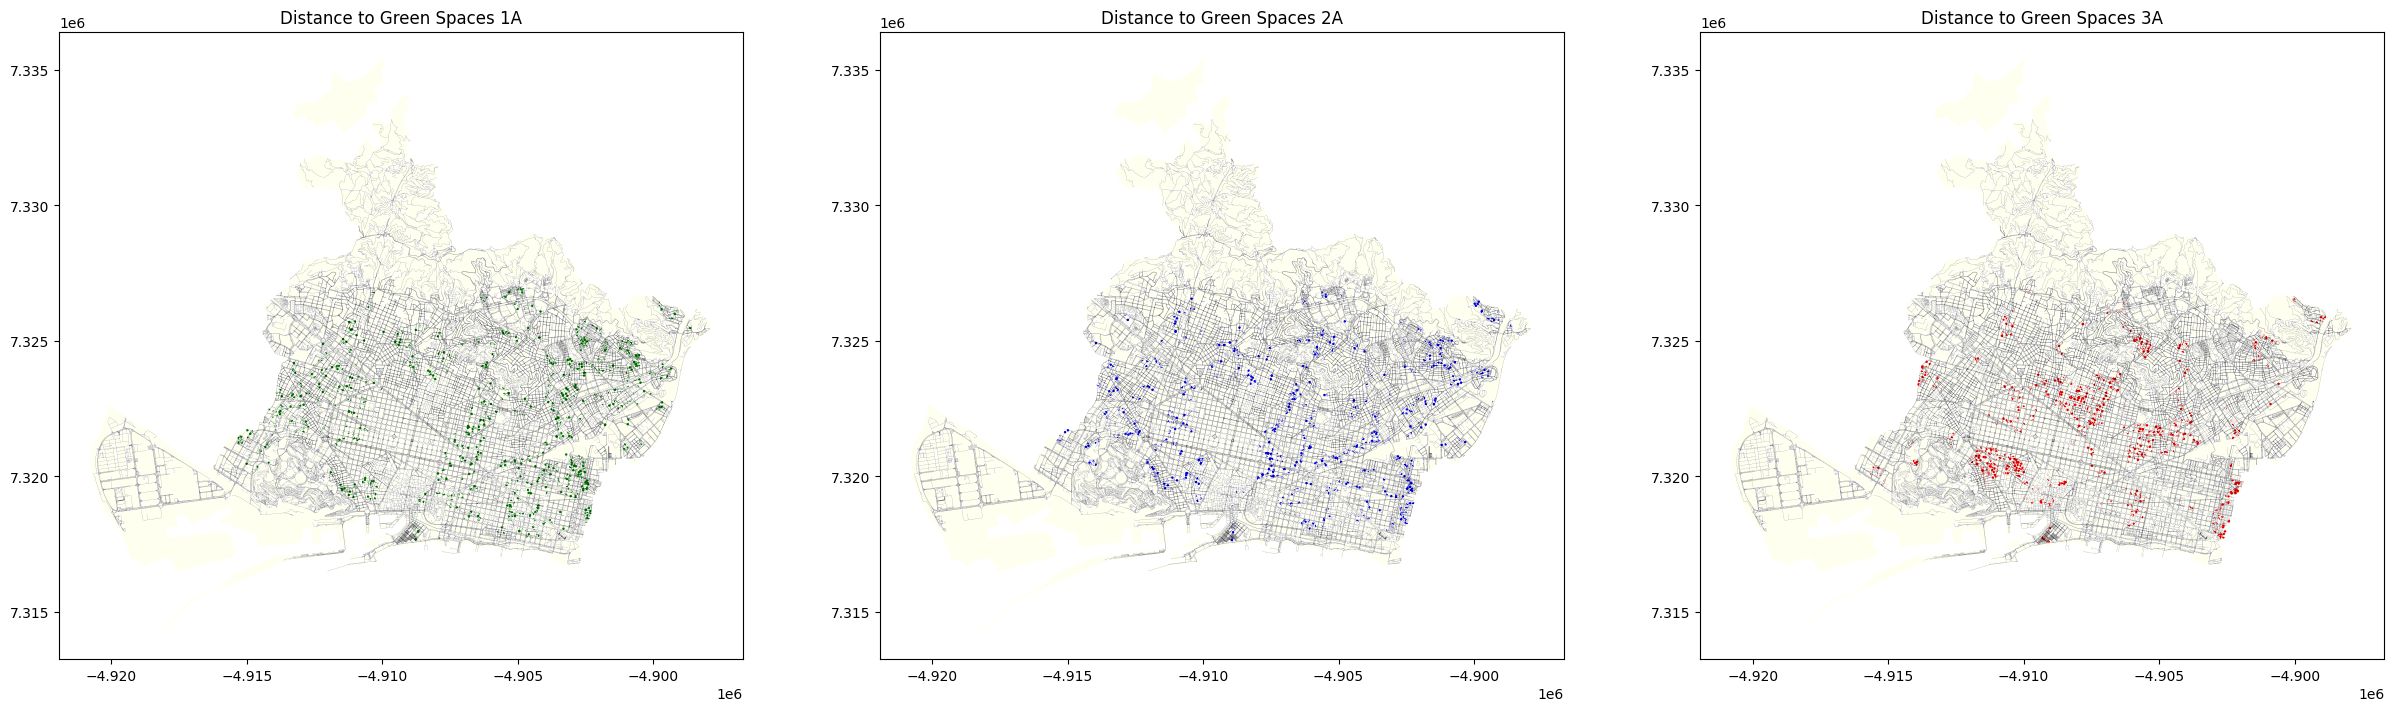

In [ ]:
#color the nodes according to their attributes 1A,2A,3A according to the third dataset

fig = plt.figure(figsize=(30,10))
unselected='white'
node_size=0.6
edge_color='black'
edge_width=0.03
boyndary_color='ivory'
#1A
ax = fig.add_subplot(1,3,1)
c_list_1A=[unselected if i==0  else 'green' for i in list(nodes['attributes_03_0']) ]    #color list
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_1A, markersize=node_size)
ax.set_title('Distance to Green Spaces 1A')

#2A
ax = fig.add_subplot(1,3,2)
c_list_2A=[unselected if i==0  else 'blue' for i in list(nodes['attributes_03_1']) ]
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_2A, markersize=node_size)
ax.set_title('Distance to Green Spaces 2A')

#3A
ax = fig.add_subplot(1,3,3)
c_list_3A=[unselected if i==0  else 'red' for i in list(nodes['attributes_03_2']) ]
boundary.plot(ax=ax, facecolor=boyndary_color)  #FROM OSMNX
edges.plot(ax=ax, linewidth=edge_width, edgecolor=edge_color)
nodes.plot(ax=ax, c=c_list_3A, markersize=node_size)
ax.set_title('Distance to Green Spaces 3A')

Original graph: Nodes = 72054, Edges = 229698
Recreated graph: Nodes = 72054, Edges = 229698


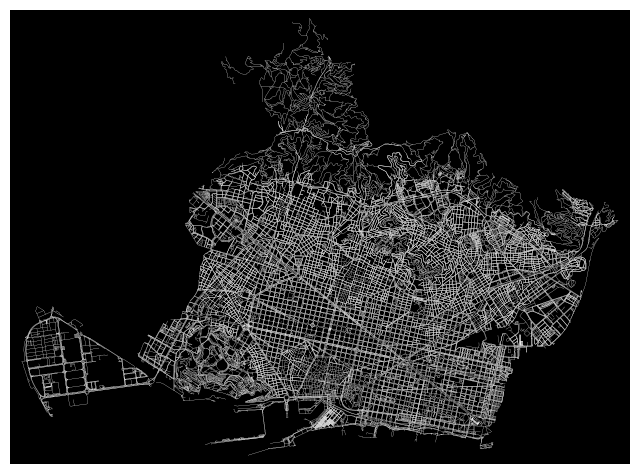

In [ ]:
# Recreate the graph from the nodes and edges GeoDataFrames
G_recreated = ox.graph_from_gdfs(nodes, edges)

# You can verify if the recreated graph is the same as the original
# by checking the number of nodes and edges, and comparing properties
print(f"Original graph: Nodes = {len(G.nodes)}, Edges = {len(G.edges)}")
print(f"Recreated graph: Nodes = {len(G_recreated.nodes)}, Edges = {len(G_recreated.edges)}")

# You can also visualize the recreated graph to visually inspect it
fig, ax = ox.plot_graph(G_recreated, bgcolor='k', node_size=0.003, edge_color='#FFFFFF', edge_linewidth=0.1, show=False, close=False)
plt.show()

In [ ]:
# show the first 5 nodes of the graph with data
list(G_recreated.nodes(data=True))[:5]


[(13019203,
  {'y': np.float64(7321424.113708922),
   'x': np.float64(-4912038.099005701),
   'street_count': np.int64(3),
   'attributes_01_0': np.int64(0),
   'attributes_01_1': np.int64(0),
   'attributes_01_2': np.int64(0),
   'attributes_01_3': np.int64(0),
   'attributes_02': np.float64(0.0),
   'attributes_03_0': np.int64(0),
   'attributes_03_1': np.int64(0),
   'attributes_03_2': np.int64(0)}),
 (8085916758,
  {'y': np.float64(7321445.8064711625),
   'x': np.float64(-4912031.550284427),
   'street_count': np.int64(4),
   'attributes_01_0': np.int64(0),
   'attributes_01_1': np.int64(0),
   'attributes_01_2': np.int64(0),
   'attributes_01_3': np.int64(0),
   'attributes_02': np.float64(0.0),
   'attributes_03_0': np.int64(0),
   'attributes_03_1': np.int64(0),
   'attributes_03_2': np.int64(0)}),
 (5720769810,
  {'y': np.float64(7321410.791053384),
   'x': np.float64(-4912038.992955356),
   'street_count': np.int64(3),
   'highway': 'traffic_signals',
   'attributes_01_0': np.

---

## 3.4 Checking the data correlation

Checking the correlation between features assigned to edges or nodes can be relevant. A correlation of 0.2-0.5 or higher may indicate that selected features have some co-dependency and could enhance the performance of machine learning models. Although the connections within graphs provide the model with a deeper understanding of classes in classification tasks, it is still could be beneficial to work with node and edge features that demonstrate some level of correlation.

In [ ]:
!pip install phik

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://phik.readthedocs.io/en/latest/phik.html

The article about "Phi-K correlation." ->
https://medium.com/omics-diary/how-to-calculate-pearson-spearman-and-phik-correlation-between-variables-using-python-3853513ca9c2

In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns
import warnings

In [ ]:
attributes_to_check = ['attributes_01_0', 'attributes_01_1', 'attributes_01_2', 'attributes_01_3', 'attributes_02', 'attributes_03_0', 'attributes_03_1', 'attributes_03_2']
data_to_check = nodes[attributes_to_check]

interval columns not set, guessing: ['attributes_01_0', 'attributes_01_1', 'attributes_01_2', 'attributes_01_3', 'attributes_02', 'attributes_03_0', 'attributes_03_1', 'attributes_03_2']


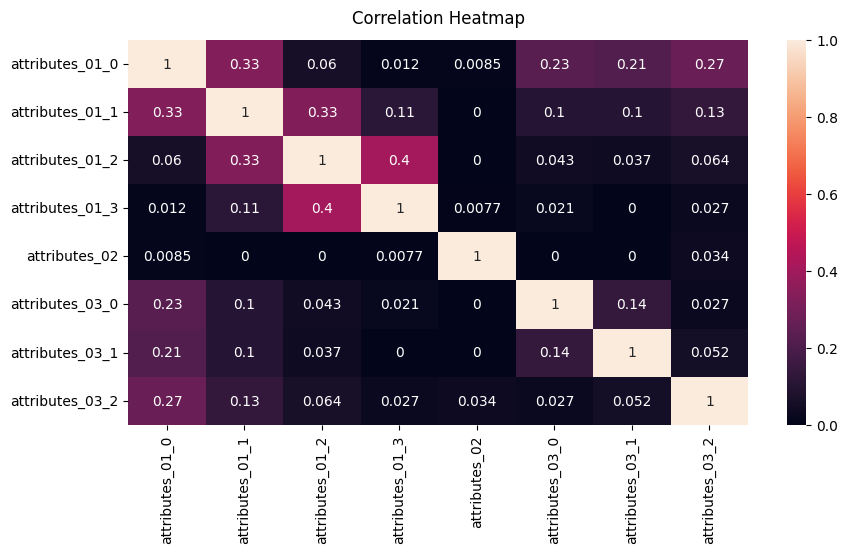

In [ ]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data_to_check.phik_matrix(), annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);